In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
import pandas as pd

run_paths = [
   # "./mlruns/117967985259146291/0320dd8c949d4fed92b098c9bc2ea4b4/metrics/", # SMALL SYN
    "./mlruns/117967985259146291/fe82d5ea6ef14bfcaa382bac08eca665/metrics/", # BIG SYN

]

df_list = []  # List to store DataFrames from each run

for run_path in run_paths:
    data = {"epoch": []}  # Dictionary to store extracted data
    
    for file_name, col_name in [("loss", "loss"), ("eval_loss", "eval_loss")]:
        file_path = os.path.join(run_path, file_name)

        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Extract epoch and loss values
                epochs, losses = [], []
                for line in lines:
                    parts = line.strip().split()  # Split by whitespace
                    if len(parts) == 3:
                        _, loss, epoch = parts
                        epochs.append(int(epoch))
                        losses.append(float(loss))
                
                data[col_name] = losses
                data["epoch"] = epochs

        else:
            print(f"File {file_name} not found in {run_path}")

    # Convert dictionary to DataFrame
    df_run = pd.DataFrame(data)

    # Add a column to indicate which run this data is from
    df_run["run"] = os.path.basename(os.path.dirname(run_path))  # Use run ID as identifier

    # Append the DataFrame to the list
    df_list.append(df_run)

# Concatenate all runs into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# ✅ Sort by epoch
df = df.sort_values(by="epoch").reset_index(drop=True)

print(df)



    

    epoch    loss  eval_loss      run
0      10  0.7351   0.629242  metrics
1      10  0.9689   1.000474  metrics
2      20  0.9717   0.939581  metrics
3      20  0.5656   0.516570  metrics
4      30  0.4645   0.457497  metrics
..    ...     ...        ...      ...
89    450  0.1252   0.202538  metrics
90    460  0.3958   0.457422  metrics
91    460  0.0990   0.202383  metrics
92    470  0.1228   0.202329  metrics
93    470  0.4423   0.457320  metrics

[94 rows x 4 columns]


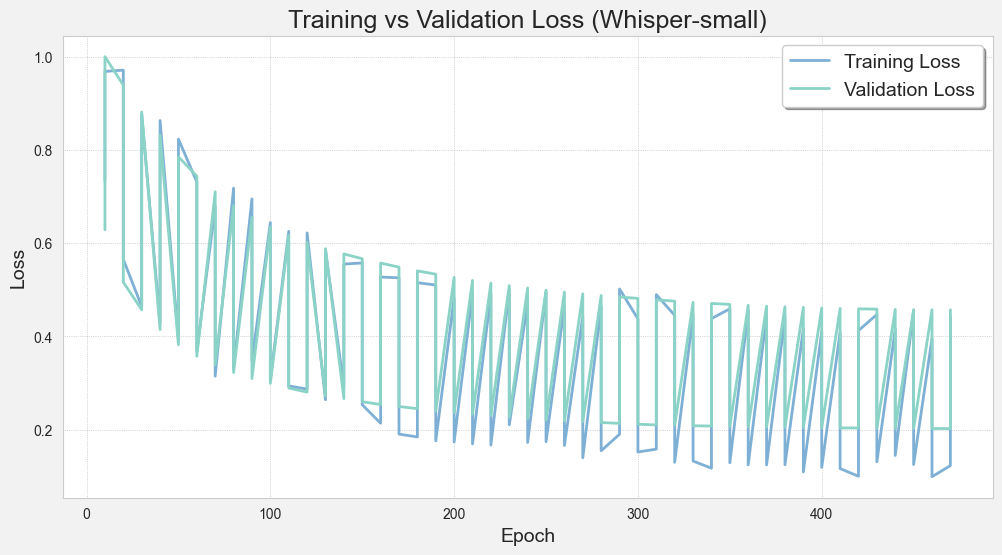

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style with a beige background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")  # Soft beige background

# Choose a beautiful font# Use a classic serif font
plt.rcParams["font.size"] = 10       # Slightly larger font

plt.plot(df["epoch"], df["loss"], label="Training Loss", 
         color="#7eb0d5", linewidth=2, alpha=1.0)
plt.plot(df["epoch"], df["eval_loss"], label="Validation Loss", 
         color="#8bd3c7", linewidth=2,  alpha=1.0)

plt.xlabel("Epoch", fontsize=14)  # Increased label padding
plt.ylabel("Loss", fontsize=14)  # Increased label padding
plt.title("Training vs Validation Loss (Whisper-small)", fontsize=18)  # Increased title padding

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)

plt.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, facecolor="white")

plt.show()
